In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
mpl.rcParams['figure.dpi']= 300

In [2]:
eval_hist = pd.read_csv('./iw_train_res/eval_res_hist.csv', header = None).values
reward_hist = eval_hist[:, 1]
baseline_energy = 45302 #kWh
baseline_ppd_mean = 10.48

In [3]:
reward_hist

array([-7116.71935267, -6835.08191418, -6802.26700446, -6524.75389594,
       -6793.36842228, -6562.15707815, -6607.92180283, -6605.2409169 ,
       -6566.53916679, -4230.13651944, -3742.82025744, -3731.12828403,
       -4496.66089657, -2897.37468363, -4030.46124804, -6052.65823603,
       -3848.16934482, -2685.58398733, -3386.56267341, -3210.17444049,
       -5314.15626921, -4893.98527169, -2969.47982182, -2892.73949866,
       -2751.18951419, -4140.9620923 , -2403.76152567, -2367.51139514,
       -2595.62964659, -2273.82384943, -4181.21640884, -4316.22321036,
       -5115.87735232, -5333.57070885, -4715.88224091, -4524.7860443 ,
       -4794.86915008, -5085.24050344, -4582.70626903, -4666.55425703,
       -4991.26895895])

In [4]:

timestep = 5; #min
all_res = [];
for i in range(1, 42, 1):
    res_path = './iw_train_res/%s.csv'%(i)
    res = pd.read_csv(res_path)
    total_heating = sum(res['EMS:IW Calculated Heating Demand [KW](TimeStep)'].values)/(60/5)
    occp = res['EMS:IW Occupy Mode Flag [](TimeStep)'].values
    ppd = res['EMS:IW Average PPD [%](TimeStep)'].values
    ppd_occp = ppd[np.where(occp>0)[0]]
    ppd_occp_mean = np.mean(ppd_occp)
    ppd_occp_std = np.std(ppd_occp)
    all_res.append([total_heating, ppd_occp_mean, ppd_occp_std])

In [5]:
all_res = np.array(all_res)
energy_savings = -100*(all_res[:, 0] - baseline_energy)/baseline_energy
ppd_impr = -100*(all_res[:, 1] - baseline_ppd_mean)/baseline_ppd_mean

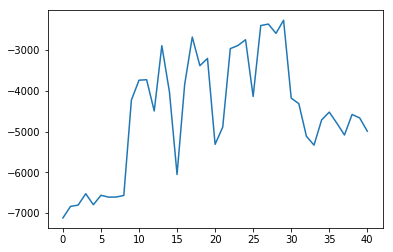

In [6]:
plt.plot(reward_hist)

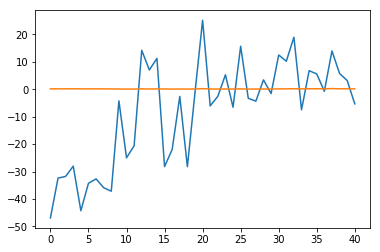

In [7]:
plt.plot(energy_savings)
plt.plot(all_res[:, 1]/100)

['0.0M', '1.0M', '2.0M', '3.0M', '4.0M', '5.0M', '6.0M', '7.0M', '8.0M', '9.0M', '10.0M']


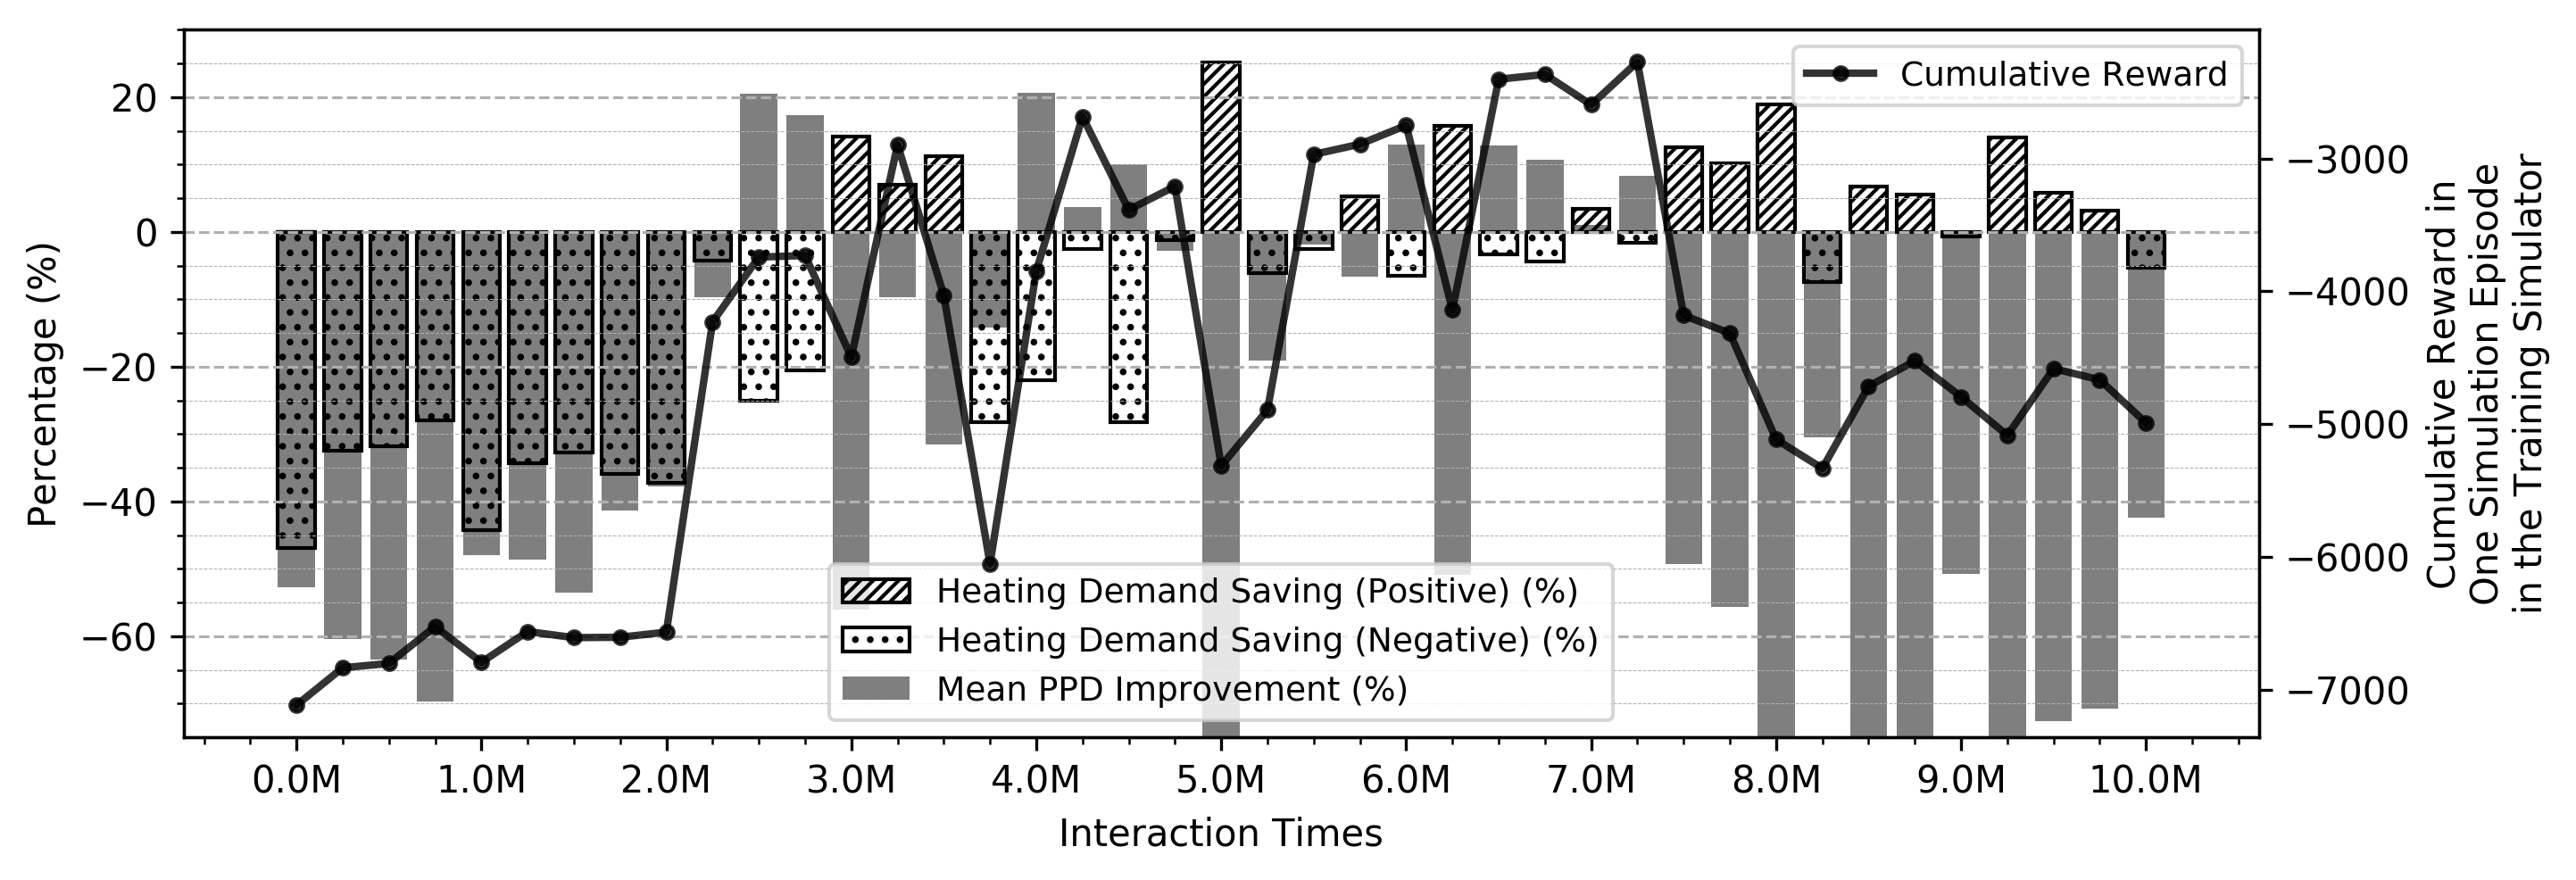

In [13]:
x = range(0, 41)
fig = plt.figure(figsize=(10, 3.5))
ax1 = plt.gca()
alpha = 1.0
for i in range(41):
    energy_saving_i = energy_savings[i];
    ppd_impr_i = ppd_impr[i];
    if energy_saving_i > ppd_impr_i and energy_saving_i>0 and ppd_impr_i>0:
        ax1.bar(x=x[i], height=energy_saving_i, edgecolor='#000000', alpha=alpha, fill=False, hatch='///////')
        ax1.bar(x=x[i], height=ppd_impr_i, color='#000000', alpha=0.5)
    elif energy_saving_i <= ppd_impr_i and energy_saving_i>0 and ppd_impr_i>0:
        ax1.bar(x=x[i], height=ppd_impr_i, color='#000000', alpha=0.5)
        ax1.bar(x=x[i], height=energy_saving_i, edgecolor='#000000', alpha=alpha, fill=False, hatch='///////')
    elif energy_saving_i > ppd_impr_i and energy_saving_i<=0 and ppd_impr_i<=0:
        ax1.bar(x=x[i], height=ppd_impr_i, color='#000000', alpha=0.5)
        ax1.bar(x=x[i], height=energy_saving_i, edgecolor='#000000', alpha=alpha, fill=False, hatch='...')
    elif energy_saving_i <= ppd_impr_i and energy_saving_i<=0 and ppd_impr_i<=0:
        ax1.bar(x=x[i], height=energy_saving_i, edgecolor='#000000', alpha=alpha, fill=False, hatch='...')
        ax1.bar(x=x[i], height=ppd_impr_i, color='#000000', alpha=0.5)
    elif energy_saving_i > 0:
        ax1.bar(x=x[i], height=energy_saving_i, edgecolor='#000000', alpha=alpha, fill=False, hatch='///////')
        ax1.bar(x=x[i], height=ppd_impr_i, color='#000000', alpha=0.5)
    else:
        ax1.bar(x=x[i], height=energy_saving_i, edgecolor='#000000', alpha=alpha, fill=False, hatch='...')
        ax1.bar(x=x[i], height=ppd_impr_i, color='#000000', alpha=0.5)
        
#ax1.plot(energy_savings, color = 'green', linestyle = '--',marker='.',markersize = 7, alpha=0.8, linewidth = 2.0, label = 'Heating Demand Saving (%)')
ax1.bar(x=0, height=0, edgecolor='#000000', alpha=alpha, fill=False, hatch='///////', label = 'Heating Demand Saving (Positive) (%)')
ax1.bar(x=0, height=0, edgecolor='#000000', alpha=alpha, fill=False, hatch='...', label = 'Heating Demand Saving (Negative) (%)')
#ax1.plot(ppd_impr, color = 'blue', marker='.', linestyle = ':', markersize = 7, alpha = 0.8, label = 'Mean PPD Improvement (%)',
#        linewidth = 2)
ax1.bar(x=0, height=0, color='#000000', alpha=0.5, label = 'Mean PPD Improvement (%)')

ax1.set_xlabel('Interaction Times', fontsize = 10)
ax1.set_ylabel('Percentage (%)', fontsize = 10)
ax1.set_ylim([-75, 30])
ax1.minorticks_on()
ax1.grid(True, 'major', axis='y', linestyle='--', linewidth=0.75)
ax1.grid(True, 'minor', axis='y', linestyle='--', linewidth=0.25)
plt.legend(fontsize = 9, loc="lower center")

ax2 = ax1.twinx()
ax2.plot(reward_hist, color = 'k', marker='.', alpha = 0.8, markersize = 7, label = 'Cumulative Reward',
        linewidth = 2)
ax2.set_ylabel('Cumulative Reward in\nOne Simulation Episode\nin the Training Simulator')

x_axis = ['%sM'%(i/100) for i in range(0, 1001, 100)]
print (x_axis)
plt.xticks(np.arange(0, 41, 4), x_axis)
plt.tick_params(labelsize = 10)
plt.legend(fontsize = 9, loc="best")
#plt.gca().xaxis.set_major_formatter(yearsFmt)
#plt.gca().xaxis.set_major_locator(months)
#print (plt.xticks()[0])
#plt.xticks(np.append(plt.xticks()[0], [x_plot[0].toordinal(), x_plot[-1].toordinal()]))

In [4]:
# Part 4 pit heavy
eval_hist = pd.read_csv('../runs/rl_parametric_part4_pit_heavy/7/eval_res_hist.csv', header = None).values
reward_hist = eval_hist[11:, 1]
rwd_max_arg = np.argmax(reward_hist)
baseline_energy = 167574
baseline_pmvnmt = 114.5

In [5]:
all_res = [];
for i in range(12, 62, 1):
    res_path = '../runs/rl_parametric_part4_pit_heavy/7/Eplus-env-Part4-Heavy-Pit-Train-v3-res1/Eplus-env-sub_run%s/output/eplusout.eso'%(i)
    with open(res_path, 'r') as eso_f:
        eso_lines = eso_f.readlines();
        header_idx_dict = {};
        is_reading_header = True;
        avg_enrg = round(float(eso_lines[144461-1].split(',')[1]), 0)
        tol_enrg = avg_enrg;
        not_met = float(eso_lines[144460-1].split(',')[1])
    all_res.append([tol_enrg, not_met])

all_res = np.array(all_res)
all_res[:, 1] = all_res[:, 1]/6
energy_savings = -100*(all_res[:, 0] - baseline_energy)/baseline_energy
ppd_impr = -100*(all_res[:, 1] - baseline_pmvnmt)/baseline_pmvnmt

Text(0.5,1,'Control Performance Evaluation History of\nRadiantHeating-Pittsburgh-Heavy with ReLu64-2 Network')

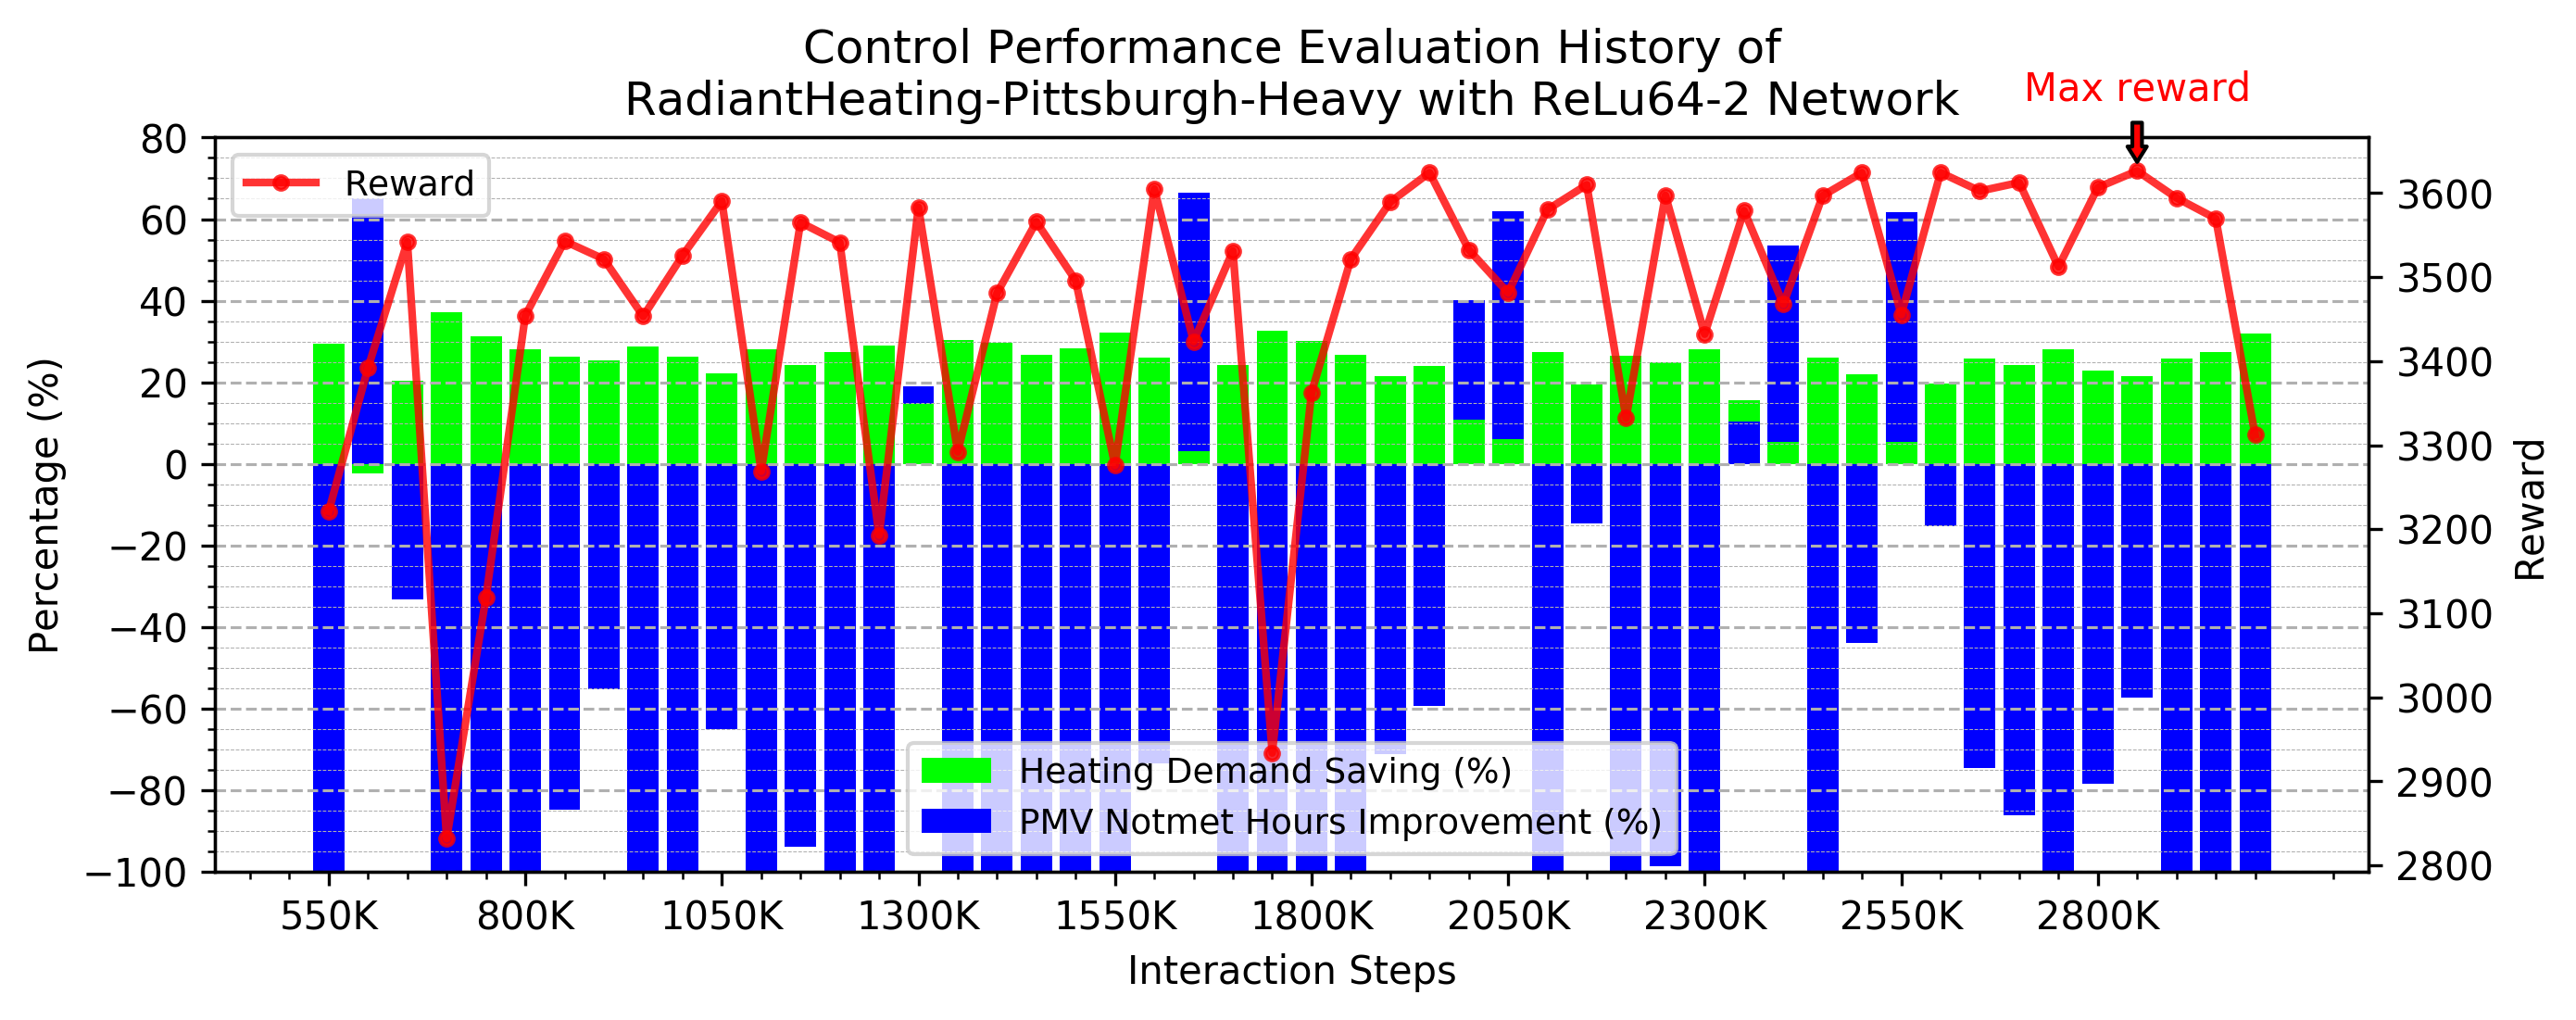

In [6]:
x = range(0, 50)
fig = plt.figure(figsize=(10, 3.5))
ax1 = plt.gca()
alpha = 1.0
for i in range(50):
    energy_saving_i = energy_savings[i];
    ppd_impr_i = ppd_impr[i];
    if energy_saving_i > ppd_impr_i and energy_saving_i>0 and ppd_impr_i>0:
        ax1.bar(x=x[i], height=energy_saving_i, color='#00ff00', alpha=alpha,)
        ax1.bar(x=x[i], height=ppd_impr_i, color='blue', alpha=alpha)
    elif energy_saving_i <= ppd_impr_i and energy_saving_i>0 and ppd_impr_i>0:
        ax1.bar(x=x[i], height=ppd_impr_i, color='blue', alpha=alpha)
        ax1.bar(x=x[i], height=energy_saving_i, color='#00ff00', alpha=alpha)
    elif energy_saving_i > ppd_impr_i and energy_saving_i<=0 and ppd_impr_i<=0:
        ax1.bar(x=x[i], height=ppd_impr_i, color='blue', alpha=alpha)
        ax1.bar(x=x[i], height=energy_saving_i, color='#00ff00', alpha=alpha)
    elif energy_saving_i <= ppd_impr_i and energy_saving_i<=0 and ppd_impr_i<=0:
        ax1.bar(x=x[i], height=energy_saving_i, color='#00ff00', alpha=alpha)
        ax1.bar(x=x[i], height=ppd_impr_i, color='blue', alpha=alpha)
    elif energy_saving_i > 0:
        ax1.bar(x=x[i], height=energy_saving_i, color='#00ff00', alpha=alpha)
        ax1.bar(x=x[i], height=ppd_impr_i, color='blue', alpha=alpha)
    else:
        ax1.bar(x=x[i], height=energy_saving_i, color='#00ff00', alpha=alpha)
        ax1.bar(x=x[i], height=ppd_impr_i, color='blue', alpha=alpha)
        
#ax1.plot(energy_savings, color = 'green', linestyle = '--',marker='.',markersize = 7, alpha=0.8, linewidth = 2.0, label = 'Heating Demand Saving (%)')
ax1.bar(x=0, height=0, color='#00ff00', alpha=1.0, label = 'Heating Demand Saving (%)')
#ax1.plot(ppd_impr, color = 'blue', marker='.', linestyle = ':', markersize = 7, alpha = 0.8, label = 'Mean PPD Improvement (%)',
#        linewidth = 2)
ax1.bar(x=0, height=0, color='blue', alpha=1.0, label = 'PMV Notmet Hours Improvement (%)')

ax1.set_xlabel('Interaction Steps', fontsize = 10)
ax1.set_ylabel('Percentage (%)', fontsize = 10)
ax1.set_ylim([-100, 80])
ax1.minorticks_on()
ax1.grid(True, 'major', axis='y', linestyle='--', linewidth=0.75)
ax1.grid(True, 'minor', axis='y', linestyle='--', linewidth=0.25)
plt.legend(fontsize = 9, loc="lower center")

ax2 = ax1.twinx()
ax2.plot(reward_hist, color = 'r', marker='.', alpha = 0.8, markersize = 7, label = 'Reward',
        linewidth = 2)
ax2.set_ylabel('Reward')

x_axis = ['%sK'%(i) for i in range(550, 3001, 250)]
plt.xticks(np.arange(0, 50, 5), x_axis)
plt.tick_params(labelsize = 10)
plt.legend(fontsize = 9, loc="best")
ax2.annotate('Max reward', 
             xy=(rwd_max_arg, reward_hist[rwd_max_arg]*1.001), xytext=(rwd_max_arg, 3700),
            arrowprops=dict(facecolor='red', shrink=0.1, width=2.5, headwidth=5, headlength=4),
            horizontalalignment='center',
            verticalalignment='bottom', fontsize = 10, color = 'red'
            )
plt.title('Control Performance Evaluation History of\nRadiantHeating-Pittsburgh-Heavy with ReLu64-2 Network')

In [55]:
reward_hist.shape

(50,)

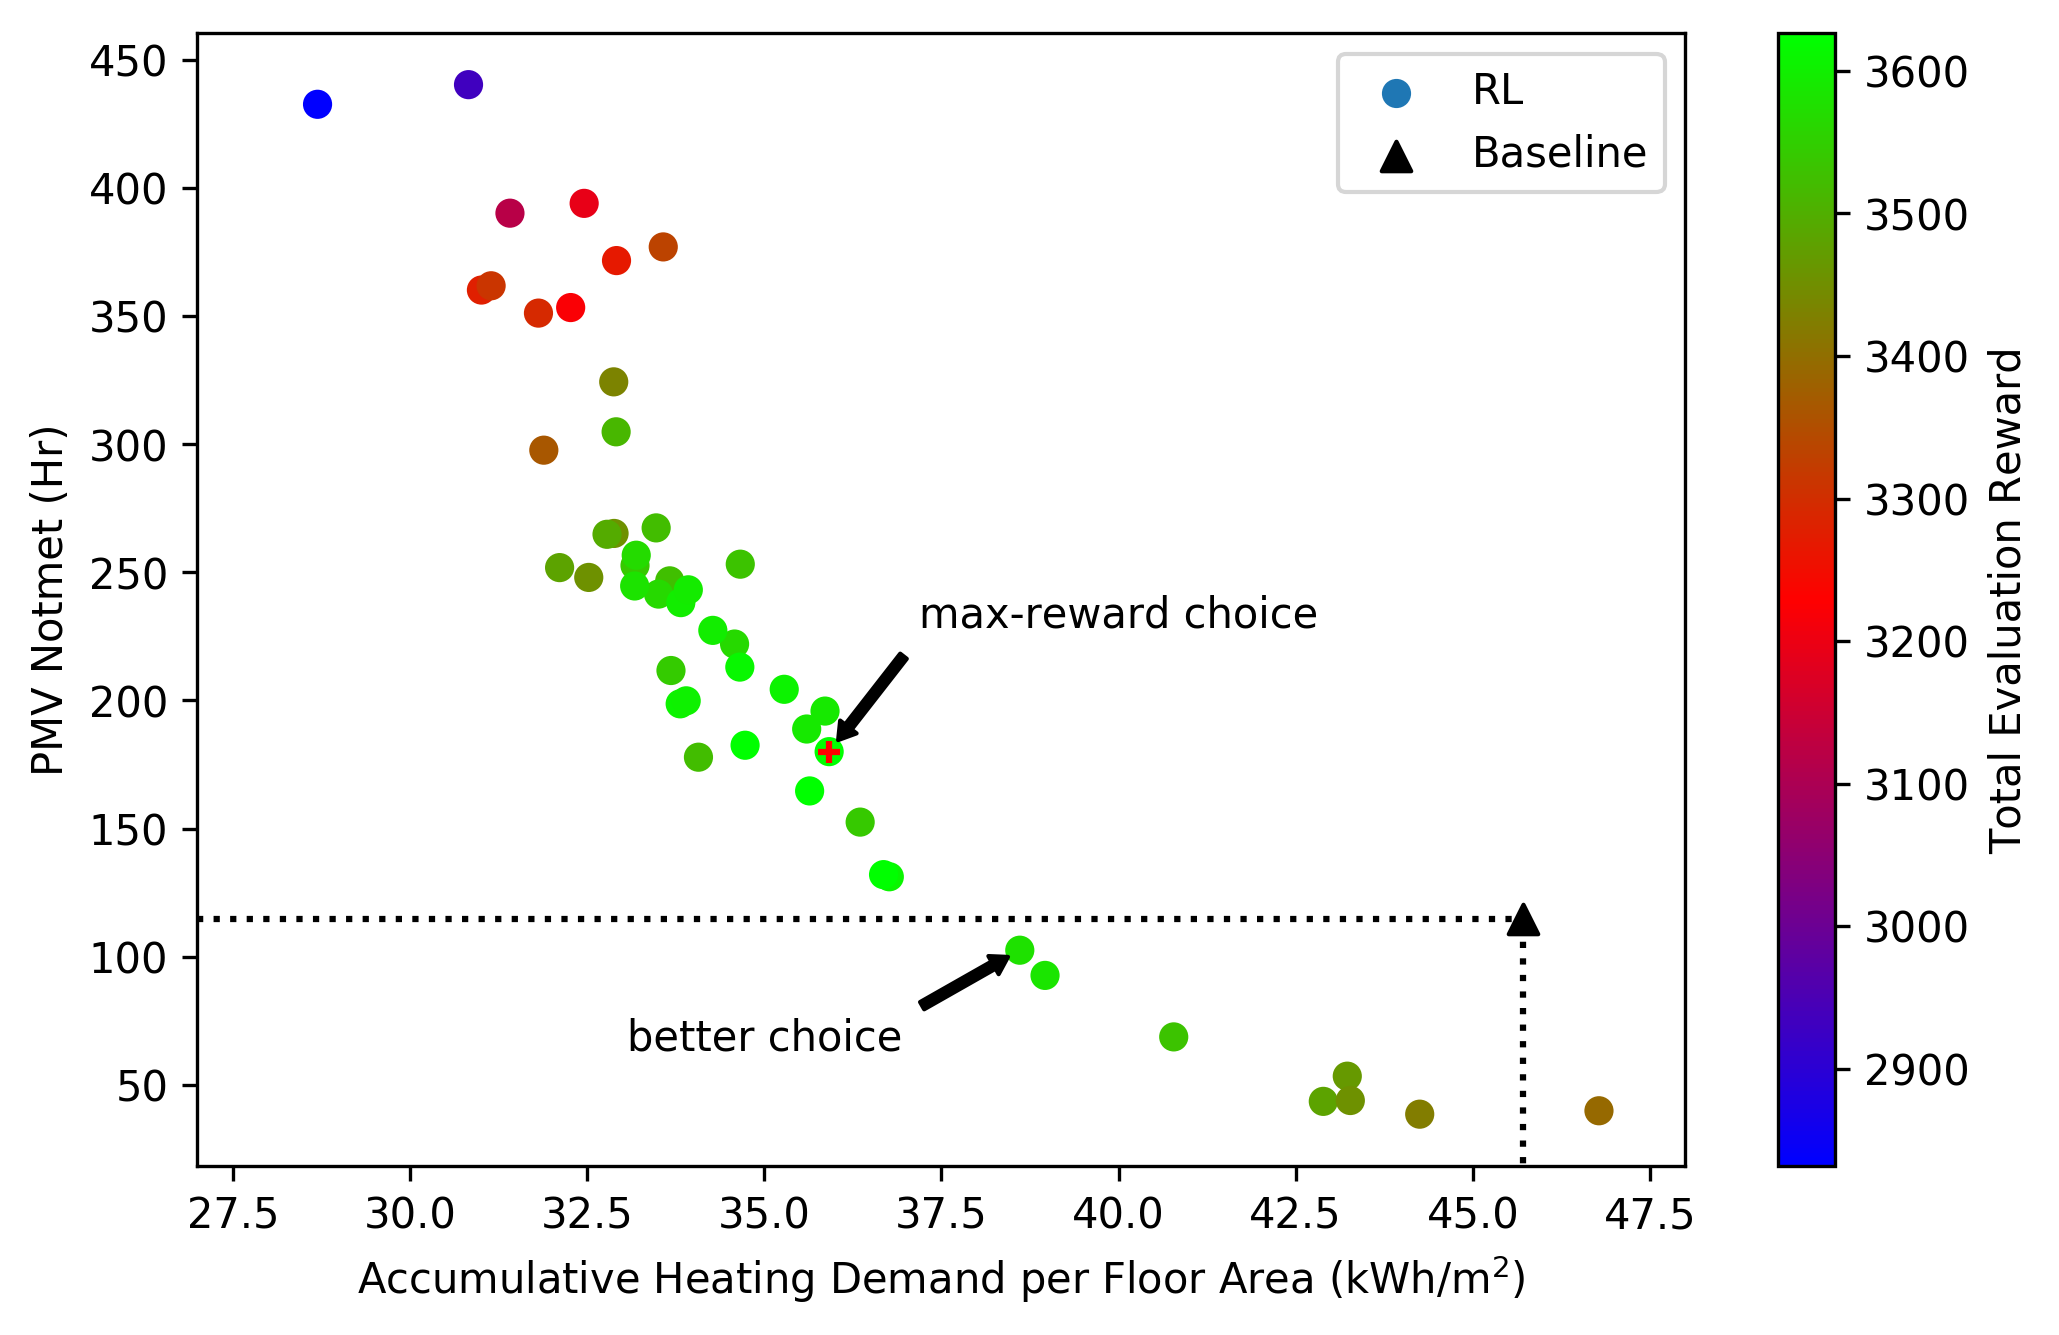

In [77]:
fig = plt.figure(figsize=(8,5))
ax1 = plt.gca()
cm = plt.cm.get_cmap('brg')
sc = ax1.scatter(all_res[:,0]/(611*6), all_res[:,1], c=reward_hist, cmap=cm, label='RL')
ax1.scatter(45.71, 114.5, marker="^", c='k', s=50, label='Baseline')
ax1.scatter((all_res[:,0]/(611*6))[rwd_max_arg], all_res[:,1][rwd_max_arg], 
            marker='+', s=30, c='red')
ax1.set_xlim([27,48])
import matplotlib.lines as mlines
base_energy_ln = mlines.Line2D([45.71,45.71],[0,114.5], color='k', linestyle=':')
base_pmv_ln = mlines.Line2D([27, 45.71],[114.5, 114.5], color='k', linestyle=':')
ax1.add_line(base_energy_ln)
ax1.add_line(base_pmv_ln)
cbar = fig.colorbar(sc)
ax1.annotate('max-reward choice', 
             xy=((all_res[:,0]/(611*6))[rwd_max_arg], all_res[:,1][rwd_max_arg]), xytext=(40, 225),
            arrowprops=dict(facecolor='k', shrink=0.1, width=2, headwidth=5, headlength=4),
            horizontalalignment='center',
            verticalalignment='bottom', fontsize = 10, color = 'k'
            )
ax1.annotate('better choice', 
             xy=((all_res[:,0]/(611*6))[36], all_res[:,1][36]), xytext=(35, 60),
            arrowprops=dict(facecolor='k', shrink=0.1, width=2, headwidth=5, headlength=4),
            horizontalalignment='center',
            verticalalignment='bottom', fontsize = 10, color = 'k'
            )
cbar.ax.set_ylabel('Total Evaluation Reward')
ax1.set_xlabel('Accumulative Heating Demand per Floor Area (kWh/m$^2$)')
ax1.set_ylabel('PMV Notmet (Hr)')
ax1.legend()

In [79]:
reward_hist[36]

3579.227106750532